# Classifying Pictures into Age Groups
This notebook is used to classify pictures of faces into age groups, based on the given labels. The `shutil` library was used to move pictures from the MegaAge and MegaAge Asian datasets into the appropriate classification folders, in order to match Keras' `.flow_from_directory()` functionality. 

Before running this notebook, please download all the image data found in the Readme. Furthermore, expect the process of running this notebook completely to take some time.

In [1]:
from shutil import copy2
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import collections

In [2]:
# Skip this cell if the folders are already created
# Creating a total of 8 classifications of age groups
class_folder_names = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71+']

# Creating a new folder for all the classification data
os.mkdir('../classification_data/')

# Creating test and train folders in the classification_data folder
os.mkdir('../classification_data/train')
os.mkdir('../classification_data/test')

# Using a for loop to create the age group folders in each train and test folder
for folder in ['train', 'test']:
    for age_group in class_folder_names:
        os.mkdir(f'../classification_data/{folder}/{age_group}')

In [3]:
# Printing directory list to see if process was finished correctly
os.listdir('../classification_data/train/')

['11-20', '51-60', '61-70', '31-40', '21-30', '71+', '41-50', '0-10']

In [4]:
# Creating a function to check class balance
def initial_class_balance(df):
    class_dict = {'0-10':0, 
                  '11-20':0, 
                  '21-30':0,
                  '31-40':0,
                  '41-50':0,
                  '51-60':0,
                  '61-70':0,
                  '71+':0}
    
    for index, row in df.iterrows():
        if row['age'] < 10:
            class_dict['0-10'] += 1
        elif row['age'] <= 20:
            class_dict['11-20'] += 1
        elif row['age'] <= 30:
            class_dict['21-30'] += 1
        elif row['age'] <= 40:
            class_dict['31-40'] += 1
        elif row['age'] <= 50:
            class_dict['41-50'] += 1
        elif row['age'] <= 60:
            class_dict['51-60'] += 1
        elif row['age'] <= 70:
            class_dict['61-70'] += 1
        else:
            class_dict['71+'] += 1
            
    return class_dict

### Classifying the MegaAge dataset

In [5]:
# Loading in the txt file with the ages of each picture (MegaAge)
train = pd.read_csv('../megaage/list/train_age.txt', sep='\n', header=None)
test = pd.read_csv('../megaage/list/test_age.txt', sep='\n', header=None)

# Loading in the file_names of each picture
train['file_name'] = pd.read_csv('../megaage/list/train_name.txt', sep='\n', header=None)
test['file_name'] = pd.read_csv('../megaage/list/test_name.txt', sep='\n', header=None)

# Renaming columns
train.columns = ['age','file_name']
test.columns = ['age','file_name']

train_classes_before = initial_class_balance(train)
test_classes_before = initial_class_balance(test)

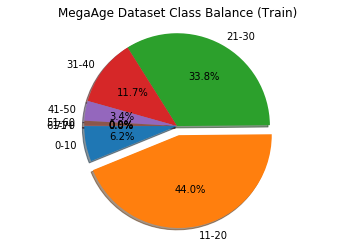

In [6]:
# os.mkdir('../images')
# Creating a pie chart to visualize class balance for train (before deleting)
fig1, ax1 = plt.subplots()
ax1.pie(x=list(train_classes_before.values()), 
        labels=train_classes_before.keys(), 
        explode=[0,0.1,0,0,0,0,0,0],
        autopct='%1.1f%%',
        shadow=True, 
        startangle=180)
ax1.axis('equal')
plt.title('MegaAge Dataset Class Balance (Train)')
plt.savefig('../images/megaage_train_class_balance_before.png');

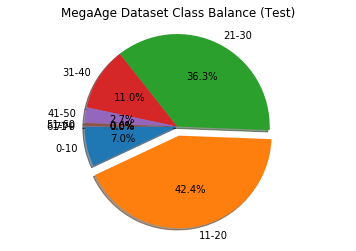

In [7]:
# Creating a pie chart to visualize class balance for test (before deleting)
fig1, ax1 = plt.subplots()
ax1.pie(x=list(test_classes_before.values()), 
        labels=test_classes_before.keys(), 
        explode=[0,0.1,0,0,0,0,0,0],
        autopct='%1.1f%%',
        shadow=True, 
        startangle=180)
ax1.axis('equal')
plt.title('MegaAge Dataset Class Balance (Test)')
plt.savefig('../images/megaage_test_class_balance_before.png');

In [8]:
# Function will classify each image appropriately, and then copy the original images from
# the MegaAge dataset into the appropriate folder for later modeling
def create_classification_folders(row, train_or_test):
    if row['age'] < 10:
        copy2(f"../megaage/{train_or_test}/{row['file_name']}", f"../classification_data/{train_or_test}/0-10")
    elif row['age'] <= 20:
        copy2(f"../megaage/{train_or_test}/{row['file_name']}", f"../classification_data/{train_or_test}/11-20")
    elif row['age'] <= 30:
        copy2(f"../megaage/{train_or_test}/{row['file_name']}", f"../classification_data/{train_or_test}/21-30")
    elif row['age'] <= 40:
        copy2(f"../megaage/{train_or_test}/{row['file_name']}", f"../classification_data/{train_or_test}/31-40")
    elif row['age'] <= 50:
        copy2(f"../megaage/{train_or_test}/{row['file_name']}", f"../classification_data/{train_or_test}/41-50")
    elif row['age'] <= 60:
        copy2(f"../megaage/{train_or_test}/{row['file_name']}", f"../classification_data/{train_or_test}/51-60")
    elif row['age'] <= 70:
        copy2(f"../megaage/{train_or_test}/{row['file_name']}", f"../classification_data/{train_or_test}/61-70")
    else:
        copy2(f"../megaage/{train_or_test}/{row['file_name']}", f"../classification_data/{train_or_test}/71+")

In [11]:
# Run the function on each row in train
for index, row in train.iterrows():
    create_classification_folders(row, "train")

In [12]:
# Run the function on each row in test
for index, row in test.iterrows():
    create_classification_folders(row, "test")

### Classifying the MegaAge Asian dataset

In [13]:
# Loading in the txt file with the ages of each picture (MegaAge Asian)
train = pd.read_csv('../megaage_asian/list/train_age.txt', sep='\n', header=None)
test = pd.read_csv('../megaage_asian/list/test_age.txt', sep='\n', header=None)

# Loading in the file_names of each picture
train['file_name'] = pd.read_csv('../megaage_asian/list/train_name.txt', sep='\n', header=None)
test['file_name'] = pd.read_csv('../megaage_asian/list/test_name.txt', sep='\n', header=None)

# Renaming columns
train.columns = ['age','file_name']
test.columns = ['age','file_name']

train_classes_before = initial_class_balance(train)
test_classes_before = initial_class_balance(test)

In [14]:
# Renaming images in MegaAge Asian dataset to have `asian_` in front of the file name
# to avoid conflict with file names from MegaAge dataset

# Skip this cell if this has been done previously
train['file_name'] = train['file_name'].apply(lambda x: "asian_"+x)

In [17]:
# To prevent name conflicts, renaming the MegaAge Asian file names
folders = ['train', 'test']
for folder in folders:
    for file in os.listdir(f'../megaage_asian/{folder}'):
        os.rename(f'../megaage_asian/{folder}/{file}', f'../megaage_asian/{folder}/asian_{file}')

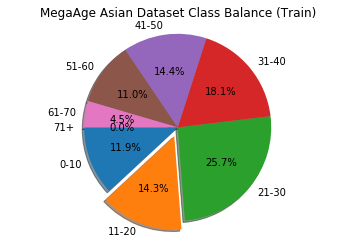

In [15]:
# os.mkdir('../images')
# Creating a pie chart to visualize class balance for train (before deleting)

fig1, ax1 = plt.subplots()
ax1.pie(x=list(train_classes_before.values()), 
        labels=train_classes_before.keys(), 
        explode=[0,0.1,0,0,0,0,0,0],
        autopct='%1.1f%%',
        shadow=True, 
        startangle=180)
ax1.axis('equal')
plt.title('MegaAge Asian Dataset Class Balance (Train)')
plt.savefig('../images/megaage_asian_train_class_balance_before.png');

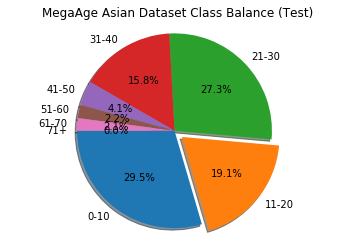

In [16]:
# os.mkdir('../images')
# Creating a pie chart to visualize class balance for train (before deleting)

fig1, ax1 = plt.subplots()
ax1.pie(x=list(test_classes_before.values()), 
        labels=test_classes_before.keys(), 
        explode=[0,0.1,0,0,0,0,0,0],
        autopct='%1.1f%%',
        shadow=True, 
        startangle=180)
ax1.axis('equal')
plt.title('MegaAge Asian Dataset Class Balance (Test)')
plt.savefig('../images/megaage_asian_test_class_balance_before.png');

As seen, the MegaAge Asian dataset is a little more balanced than the MegaAge dataset.

After adding in the images from the IMDB and Wiki dataset, we will check class balance once more to see if further action has to be taken.

In [18]:
# Function will classify each image appropriately, and then copy the original images from
# the MegaAge Asian dataset into the appropriate folder for later modeling
def create_classification_folders_asian(row, train_or_test):
    if row['age'] < 10:
        copy2(f"../megaage_asian/{train_or_test}/{row['file_name']}", f"../classification_data/{train_or_test}/0-10")
    elif row['age'] <= 20:
        copy2(f"../megaage_asian/{train_or_test}/{row['file_name']}", f"../classification_data/{train_or_test}/11-20")
    elif row['age'] <= 30:
        copy2(f"../megaage_asian/{train_or_test}/{row['file_name']}", f"../classification_data/{train_or_test}/21-30")
    elif row['age'] <= 40:
        copy2(f"../megaage_asian/{train_or_test}/{row['file_name']}", f"../classification_data/{train_or_test}/31-40")
    elif row['age'] <= 50:
        copy2(f"../megaage_asian/{train_or_test}/{row['file_name']}", f"../classification_data/{train_or_test}/41-50")
    elif row['age'] <= 60:
        copy2(f"../megaage_asian/{train_or_test}/{row['file_name']}", f"../classification_data/{train_or_test}/51-60")
    elif row['age'] <= 70:
        copy2(f"../megaage_asian/{train_or_test}/{row['file_name']}", f"../classification_data/{train_or_test}/61-70")
    else:
        copy2(f"../megaage_asian/{train_or_test}/{row['file_name']}", f"../classification_data/{train_or_test}/71+")

In [19]:
# Run the function on each row in train
for index, row in train.iterrows():
    try:
        create_classification_folders_asian(row, "train")
    except:
        pass

In [20]:
# Run the function on each row in test
for index, row in test.iterrows():
    try:
        create_classification_folders_asian("megaage_asian", row, "test")
    except:
        pass

### Classifying the IMDB and Wiki datasets
The next section of classifying the IMDB and Wiki datasets has, for now, been put on hold. The CNN models will only be run on the MegaAge and MegaAge Asian datasets.

In [15]:
# # the file name for the wiki images have the format:
# # number_birth-date_year-picture-taken
# # therefore, splitting on "_" will allow us to retreive someone's age
# def age_of_wiki(s):
#     splits = s.split('_')
#     before = splits[1]
#     after = splits[2]
#     age = int(after[:4]) - int(before[:4])
#     return np.abs(age)

In [16]:
# # the file name for the IMDB images have the format: 
# # rm..._rm..._birth-date_year-picture-taken
# # therefore, splitting on "_" will allow us to retrieve someone's age
# def age_of_imdb(s):
#     splits = s.split('_')
#     before = splits[2]
#     after = splits[3]
#     age = int(after[:4]) - int(before[:4])
#     return np.abs(age)

In [17]:
# def classify_age(age):
#     if age < 10:
#         return '0-10'
#     elif age <= 20:
#         return '11-20'
#     elif age <= 30:
#         return '21-30'
#     elif age <= 40:
#         return '31-40'
#     elif age <= 50:
#         return '41-50'
#     elif age <= 60:
#         return '51-60'
#     elif age <= 70:
#         return '61-70'
#     else:
#         return '71+'

In [19]:
# # Going through all the pictures in the IMDB and Wiki dataset,
# # Randomly choosing 75% of pictures to go into train,
# # the other 25% to go into test
# np.random.seed(42)

# folder = 'imdb'
# for subfolder in os.listdir(f'../{folder}/'):
#     for file in os.listdir(f'../{folder}/{subfolder}'):
#         try:
#             age_group = classify_age(age_of_imdb(file))
#             if np.random.random() < 0.75:
#                 copy2(f'../{folder}/{subfolder}/{file}', f'../classification_data/train/{age_group}')
#             else:
#                 copy2(f'../{folder}/{subfolder}/{file}', f'../classification_data/test/{age_group}')
#         except:
#             pass

In [ ]:
# # Going through all the pictures in the IMDB and Wiki dataset,
# # Randomly choosing 75% of pictures to go into train,
# # the other 25% to go into test
# np.random.seed(42)

# folder = 'wiki'
# for subfolder in os.listdir(f'../{folder}/'):
#     for file in os.listdir(f'../{folder}/{subfolder}'):
#         try:
#             age_group = classify_age(age_of_wiki(file))
#             if np.random.random() < 0.75:
#                 copy2(f'../{folder}/{subfolder}/{file}', f'../classification_data/train/{age_group}')
#             else:
#                 copy2(f'../{folder}/{subfolder}/{file}', f'../classification_data/test/{age_group}')
#         except:
#             pass

In [21]:
# Looking at the new class percentages
# The baseline accuracy will be the highest percentage value
# os.remove('./data/train/.DS_Store')
train_classes = {}

train_classes.update({folder:len(os.listdir(f'../classification_data/train/{folder}')) for folder in os.listdir('../classification_data/train/')})

train_classes_percentages = {}
total = train_classes.values
for k,v in train_classes.items():
    train_classes_percentages[k] = v/sum(train_classes.values())

train_classes_percentages

{'11-20': 0.2783234120227214,
 '51-60': 0.06399585893122284,
 '61-70': 0.024846412662952417,
 '31-40': 0.15200719238261295,
 '21-30': 0.2937298225061639,
 '71+': 0.0,
 '41-50': 0.09422293661712822,
 '0-10': 0.09287436487719825}

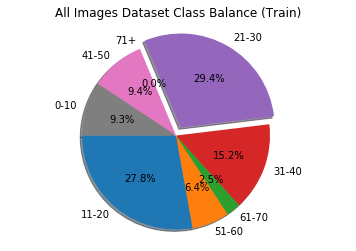

In [22]:
# Creating a pie chart to visualize class balance for all train images
fig1, ax1 = plt.subplots()
ax1.pie(x=list(train_classes_percentages.values()), 
        labels=train_classes_percentages.keys(), 
        explode=[0,0,0,0,0.1,0,0,0],
        autopct='%1.1f%%',
        shadow=True, 
        startangle=180)
ax1.axis('equal')
plt.title('All Images Dataset Class Balance (Train)')
plt.savefig('../images/train_class_balance_after.png');

In [23]:
# Looking at the class balance percentage in test images
# os.remove('./data/test/.DS_Store')
test_classes = {}

test_classes.update({folder:len(os.listdir(f'../classification_data/test/{folder}')) for folder in os.listdir('../classification_data/test/')})

test_classes_percentages = {}
total = test_classes.values
for k,v in test_classes.items():
    test_classes_percentages[k] = v/sum(test_classes.values())

test_classes_percentages

{'11-20': 0.4241500586166471,
 '51-60': 0.005978898007033997,
 '61-70': 0.00023446658851113716,
 '31-40': 0.11019929660023446,
 '21-30': 0.3626025791324736,
 '71+': 0.0,
 '41-50': 0.027080890973036342,
 '0-10': 0.0697538100820633}

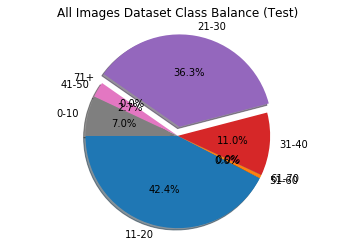

In [24]:
# Creating a pie chart to visualize class balance for test
fig1, ax1 = plt.subplots()
ax1.pie(x=list(test_classes_percentages.values()), 
        labels=test_classes_percentages.keys(), 
        explode=[0,0,0,0,0.1,0,0,0],
        autopct='%1.1f%%',
        shadow=True, 
        startangle=180)
ax1.axis('equal')
plt.title('All Images Dataset Class Balance (Test)')
plt.savefig('../images/test_class_balance_after.png');

The baseline accuracy score will be the highest percentage of classes in the train and test folders, which is at about 30%. There is a big discrepancy between class percentages, and this might have an impact on the model accuracy further along. At this point, the images should have been placed correctly into each classification folder. There is no need to clean image data, since these images have already been preprocessed.

# The below section only applies when using the IMDB and Wiki Dataset
As such, can be skipped for now

### Removing corrupted image files
For whatever reason, some files became corrupted in the process of trying to move the images into the correct classification groups. I became aware of this issue as I was first trying to feed the images into the CNN model.

In [25]:
# Number of not working images in train
not_working_train = 0
for folder in os.listdir('../classification_data/train'):
    for image in os.listdir(f'../classification_data/train/{folder}'):
        try:
            Image.open(f'../classification_data/train/{folder}/{image}')
        except:
            not_working_train +=1
print(not_working_train)

0


In [20]:
24772/148914

0.1663510482560404

In [19]:
# Number of not working images in test
not_working_test = 0
for folder in os.listdir('../classification_data/test'):
    for image in os.listdir(f'../classification_data/test/{folder}'):
        try:
            Image.open(f'../classification_data/test/{folder}/{image}')
        except:
            not_working_test +=1
print(not_working_test)

4996


In [21]:
4996/30239

0.16521710374020304

That is about 17% of both train and test data that have corrupt images. This is a considerable percentage, but since there is still a substantial number of images available, we should take a look at the distribution of those corrupt images.

In [26]:
# Number of not working images in train
train_corrupt_images_by_class = {}
for folder in os.listdir('../classification_data/train'):
    for image in os.listdir(f'../classification_data/train/{folder}'):
        try:
            Image.open(f'../classification_data/train/{folder}/{image}')
        except:
            if folder not in train_corrupt_images_by_class.keys():
                train_corrupt_images_by_class[folder] = 0
            train_corrupt_images_by_class[folder] += 1
print(train_corrupt_images_by_class)

{'11-20': 4082, '51-60': 1859, '61-70': 1011, '31-40': 4410, '21-30': 7630, '71+': 441, '41-50': 3574, '0-10': 1765}


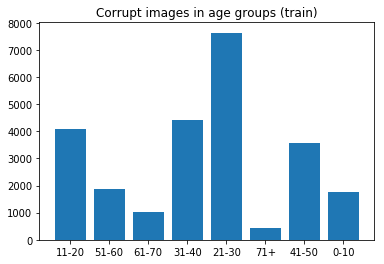

In [47]:
plt.bar(train_corrupt_images_by_class.keys(), train_corrupt_images_by_class.values());
plt.title('Corrupt images in age groups (train)')
plt.savefig('../images/train_corrupt.png')

In [27]:
# Number of not working images in train
test_corrupt_images_by_class = {}
for folder in os.listdir('../classification_data/test'):
    for image in os.listdir(f'../classification_data/test/{folder}'):
        try:
            Image.open(f'../classification_data/test/{folder}/{image}')
        except:
            if folder not in test_corrupt_images_by_class.keys():
                test_corrupt_images_by_class[folder] = 0
            test_corrupt_images_by_class[folder] += 1
print(test_corrupt_images_by_class)

{'11-20': 842, '51-60': 359, '61-70': 114, '31-40': 993, '21-30': 1639, '71+': 137, '41-50': 759, '0-10': 153}


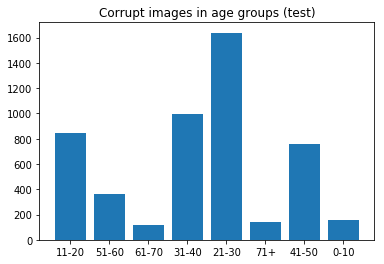

In [48]:
plt.bar(test_corrupt_images_by_class.keys(), test_corrupt_images_by_class.values());
plt.title('Corrupt images in age groups (test)')
plt.savefig('../images/test_corrupt.png')

Furthermore, the corrupt images are mostly correlated to the relative size of the class. In that case, removing the corrupt images from the over dataset will have minimal effect on the ability for the the model to work.

In [50]:
# removing corrupt images from both train and test datasets
for t in ['train', 'test']:
    for folder in os.listdir(f'../classification_data/{t}'):
        for image in os.listdir(f'../classification_data/{t}/{folder}'):
            try:
                Image.open(f'../classification_data/{t}/{folder}/{image}')
            except:
                os.remove(f'../classification_data/{t}/{folder}/{image}')

At this point, all corrupt images should have been removed, and all the images should be in the correct classification folders.

In [51]:
train_classes = {}

train_classes.update({folder:len(os.listdir(f'../classification_data/train/{folder}')) for folder in os.listdir('../classification_data/train/')})

train_classes_percentages = {}
total = train_classes.values
for k,v in train_classes.items():
    train_classes_percentages[k] = v/sum(train_classes.values())

train_classes_percentages

{'11-20': 0.19416474682218748,
 '51-60': 0.07373008329171432,
 '61-70': 0.03724766799310467,
 '31-40': 0.17440511672117415,
 '21-30': 0.32057643666124275,
 '71+': 0.020412108714214366,
 '41-50': 0.1165842341834351,
 '0-10': 0.06287960561292713}

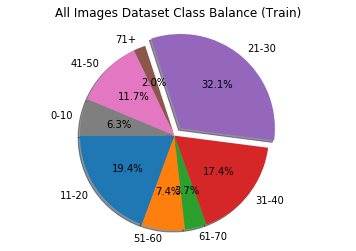

In [52]:
# Creating a pie chart to visualize class balance for all train images
fig1, ax1 = plt.subplots()
ax1.pie(x=list(train_classes_percentages.values()), 
        labels=train_classes_percentages.keys(), 
        explode=[0,0,0,0,0.1,0,0,0],
        autopct='%1.1f%%',
        shadow=True, 
        startangle=180)
ax1.axis('equal')
plt.title('All Images Dataset Class Balance (Train)')
plt.savefig('../images/train_class_balance_after_deleting_corrupt.png');